In [429]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [430]:
# import data
store_data = pd.read_csv('QVI_data.csv')

In [431]:
# inspect data
store_data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Unnamed: 12,Unnamed: 13,month_year
0,1000,17/10/2018,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,-,-,102018
1,1002,16/09/2018,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,-,-,92018
2,1003,07/03/2019,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,-,-,32019
3,1003,08/03/2019,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,-,-,32019
4,1004,02/11/2018,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,-,-,112018


In [432]:
# describe data
store_data.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,month_year
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512,67376.908388
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148,34488.233583
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000,12019.000000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000,42019.000000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000,72018.000000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000,102018.000000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000,122018.000000


In [433]:
# SELECT CONTROL STORES
# Note our target metrics to identify stores:
# - month overal sales rev
# - month num customer
# - month num transactions per customer

# Trials were performed in stores 77, 86, 88

In [434]:
# metric 1: monthly overall sales revenue by store
store_data['month_year'] = pd.to_datetime(store_data['DATE']).dt.to_period('M')
store_data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Unnamed: 12,Unnamed: 13,month_year
0,1000,17/10/2018,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,-,-,2018-10
1,1002,16/09/2018,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,-,-,2018-09
2,1003,07/03/2019,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,-,-,2019-07
3,1003,08/03/2019,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,-,-,2019-08
4,1004,02/11/2018,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,-,-,2018-02


In [435]:
# before selecting data before trial period create copy of dataframe for later use
store_data_orig = store_data.copy()

# The trial period goes from the start of February 2019 to April 2019
# select data before trial period  as per the brief
store_data = store_data[(store_data['month_year'] != '2019-02') & (store_data['month_year'] != '2019-03') & (store_data['month_year'] != '2019-04')]

In [436]:
# monthly overall sales revenue by store
mon_sal_rev = store_data.groupby(['month_year', 'STORE_NBR'])['TOT_SALES'].sum().reset_index()
mon_sal_rev.head()

,month_year,STORE_NBR,TOT_SALES
0,2018-01,1,76.0
1,2018-01,2,37.4
2,2018-01,3,180.0
3,2018-01,4,248.1
4,2018-01,5,191.0


In [437]:
# monthly num customers by store
mon_num_cust = store_data.groupby(['month_year', 'STORE_NBR'])['LYLTY_CARD_NBR'].count().reset_index()
mon_num_cust.head()

,month_year,STORE_NBR,LYLTY_CARD_NBR
0,2018-01,1,19
1,2018-01,2,10
2,2018-01,3,20
3,2018-01,4,28
4,2018-01,5,27


In [438]:
# monthly num transactions by customer
mon_num_tra = store_data.groupby(['month_year', 'LYLTY_CARD_NBR'])['TXN_ID'].count().reset_index()
mon_num_tra.head()

,month_year,LYLTY_CARD_NBR,TXN_ID
0,2018-01,1011,1
1,2018-01,1060,1
2,2018-01,1134,1
3,2018-01,1224,1
4,2018-01,1233,1


In [439]:
# we will select trial stores by using the correlation variables
# join relevant dataframes together 
df_concat = pd.concat([mon_sal_rev, mon_num_cust], axis=1)

# drop duplicate columns
df_concat = df_concat.loc[:,~df_concat.columns.duplicated()]

# rename LYLTY_CARD_NBR to cust_cnt
df_concat.rename(columns = {'LYLTY_CARD_NBR':'cust_cnt'}, inplace=True)

df_concat.head()

,month_year,STORE_NBR,TOT_SALES,cust_cnt
0,2018-01,1,76.0,19
1,2018-01,2,37.4,10
2,2018-01,3,180.0,20
3,2018-01,4,248.1,28
4,2018-01,5,191.0,27


In [440]:
# before normalising create a copy of the dataset for later use
df_base = df_concat.copy()

# normalise tot sales column
df_concat['TOT_SALES'] = df_concat['TOT_SALES']/df_concat['TOT_SALES'].max()

# normalise cust_cnt column
df_concat['cust_cnt'] = df_concat['cust_cnt']/df_concat['cust_cnt'].max()

# # find values for control stores
df_77 = df_concat[df_concat['STORE_NBR']==77]
df_86 = df_concat[df_concat['STORE_NBR']==86]
df_88 = df_concat[df_concat['STORE_NBR']==88]

# drop control stores
av_df_new = df_concat[(df_concat['STORE_NBR'] != 77) & (df_concat['STORE_NBR'] != 86) & (df_concat['STORE_NBR'] != 88)]

av_df_new.head()

,month_year,STORE_NBR,TOT_SALES,cust_cnt
0,2018-01,1,0.056051,0.115854
1,2018-01,2,0.027583,0.060976
2,2018-01,3,0.132753,0.121951
3,2018-01,4,0.182978,0.170732
4,2018-01,5,0.140866,0.164634


In [441]:
# merge values into dataframe (appends the values for each control store by month as columns in dataframe)
# calculate difference between total sales and customer count for each row compared to that for store 77
df2 = pd.merge(av_df_new, df_77, on='month_year')

df2.rename(columns = {'STORE_NBR_y':'STORE_NBR_77', 'TOT_SALES_y': 'TOT_SALES_77', 'cust_cnt_y': 'cust_cnt_77'}, inplace=True)

df2.head()

,month_year,STORE_NBR_x,TOT_SALES_x,cust_cnt_x,STORE_NBR_77,TOT_SALES_77,cust_cnt_77
0,2018-01,1,0.056051,0.115854,77,0.019102,0.030488
1,2018-01,2,0.027583,0.060976,77,0.019102,0.030488
2,2018-01,3,0.132753,0.121951,77,0.019102,0.030488
3,2018-01,4,0.182978,0.170732,77,0.019102,0.030488
4,2018-01,5,0.140866,0.164634,77,0.019102,0.030488


In [442]:
df3 = pd.merge(df2, df_86, on = 'month_year')

df3.rename(columns = {'STORE_NBR':'STORE_NBR_86', 'TOT_SALES': 'TOT_SALES_86', 'cust_cnt': 'cust_cnt_86'}, inplace=True)

df3.head()

,month_year,STORE_NBR_x,TOT_SALES_x,cust_cnt_x,STORE_NBR_77,TOT_SALES_77,cust_cnt_77,STORE_NBR_86,TOT_SALES_86,cust_cnt_86
0,2018-01,1,0.056051,0.115854,77,0.019102,0.030488,86,0.127886,0.158537
1,2018-01,2,0.027583,0.060976,77,0.019102,0.030488,86,0.127886,0.158537
2,2018-01,3,0.132753,0.121951,77,0.019102,0.030488,86,0.127886,0.158537
3,2018-01,4,0.182978,0.170732,77,0.019102,0.030488,86,0.127886,0.158537
4,2018-01,5,0.140866,0.164634,77,0.019102,0.030488,86,0.127886,0.158537


In [443]:
df4 = pd.merge(df3, df_88, on = 'month_year')

df4.rename(columns = {'STORE_NBR':'STORE_NBR_88', 'TOT_SALES': 'TOT_SALES_88', 'cust_cnt': 'cust_cnt_88'}, inplace=True)

df4.head()

,month_year,STORE_NBR_x,TOT_SALES_x,cust_cnt_x,STORE_NBR_77,TOT_SALES_77,cust_cnt_77,STORE_NBR_86,TOT_SALES_86,cust_cnt_86,STORE_NBR_88,TOT_SALES_88,cust_cnt_88
0,2018-01,1,0.056051,0.115854,77,0.019102,0.030488,86,0.127886,0.158537,88,0.193525,0.182927
1,2018-01,2,0.027583,0.060976,77,0.019102,0.030488,86,0.127886,0.158537,88,0.193525,0.182927
2,2018-01,3,0.132753,0.121951,77,0.019102,0.030488,86,0.127886,0.158537,88,0.193525,0.182927
3,2018-01,4,0.182978,0.170732,77,0.019102,0.030488,86,0.127886,0.158537,88,0.193525,0.182927
4,2018-01,5,0.140866,0.164634,77,0.019102,0.030488,86,0.127886,0.158537,88,0.193525,0.182927


In [444]:
# find difference between normalised variables and add as columns to dataframe

df4['dts_77'] = abs(df4['TOT_SALES_x'] - df4['TOT_SALES_77'])
df4['dc_77'] = abs(df4['cust_cnt_x'] - df4['cust_cnt_77'])
df4['dav_77'] = df4[['dts_77','dc_77']].mean(axis=1)

df4['dts_86'] = abs(df4['TOT_SALES_x'] - df4['TOT_SALES_86'])
df4['dc_86'] = abs(df4['cust_cnt_x'] - df4['cust_cnt_86'])
df4['dav_86'] = df4[['dts_86','dc_86']].mean(axis=1)

df4['dts_88'] = abs(df4['TOT_SALES_x'] - df4['TOT_SALES_88'])
df4['dc_88'] = abs(df4['cust_cnt_x'] - df4['cust_cnt_88'])
df4['dav_88'] = df4[['dts_88','dc_88']].mean(axis=1)

df4.head()

,month_year,STORE_NBR_x,TOT_SALES_x,cust_cnt_x,STORE_NBR_77,TOT_SALES_77,cust_cnt_77,STORE_NBR_86,TOT_SALES_86,cust_cnt_86,...,cust_cnt_88,dts_77,dc_77,dav_77,dts_86,dc_86,dav_86,dts_88,dc_88,dav_88
0,2018-01,1,0.056051,0.115854,77,0.019102,0.030488,86,0.127886,0.158537,...,0.182927,0.036950,0.085366,0.061158,0.071834,0.042683,0.057259,0.137473,0.067073,0.102273
1,2018-01,2,0.027583,0.060976,77,0.019102,0.030488,86,0.127886,0.158537,...,0.182927,0.008481,0.030488,0.019485,0.100302,0.097561,0.098932,0.165941,0.121951,0.143946
2,2018-01,3,0.132753,0.121951,77,0.019102,0.030488,86,0.127886,0.158537,...,0.182927,0.113651,0.091463,0.102557,0.004868,0.036585,0.020726,0.060771,0.060976,0.060874
3,2018-01,4,0.182978,0.170732,77,0.019102,0.030488,86,0.127886,0.158537,...,0.182927,0.163876,0.140244,0.152060,0.055093,0.012195,0.033644,0.010547,0.012195,0.011371
4,2018-01,5,0.140866,0.164634,77,0.019102,0.030488,86,0.127886,0.158537,...,0.182927,0.121764,0.134146,0.127955,0.012980,0.006098,0.009539,0.052659,0.018293,0.035476


In [445]:
# use groupby to create new dataframes which calculate mean distance from trial stores over observation period

dfn_77 = df4.groupby(['STORE_NBR_x'])['dav_77'].mean().reset_index()
dfn_86 = df4.groupby(['STORE_NBR_x'])['dav_86'].mean().reset_index()
dfn_88 = df4.groupby(['STORE_NBR_x'])['dav_88'].mean().reset_index()


In [446]:
# print control stores

ctrl_77 = dfn_77[dfn_77['dav_77'] == dfn_77['dav_77'].min()].STORE_NBR_x.iloc[0]
ctrl_86 = dfn_86[dfn_86['dav_86'] == dfn_86['dav_86'].min()].STORE_NBR_x.iloc[0]
ctrl_88 = dfn_88[dfn_88['dav_88'] == dfn_88['dav_88'].min()].STORE_NBR_x.iloc[0]

print('control for store 77 =', ctrl_77)
print('control for store 86 =', ctrl_86)
print('control for store 88 =', ctrl_88)

control for store 77 = 205
control for store 86 = 101
control for store 88 = 199


In [447]:
# inspect data for trial store and control store
print(df_base[df_base['STORE_NBR']==77], '\n')
print(df_base[df_base['STORE_NBR']==ctrl_77], '\n')

     month_year  STORE_NBR  TOT_SALES  cust_cnt
72      2018-01         77       25.9         5
326     2018-02         77       35.4         8
583     2018-03         77       73.8        13
836     2018-04         77       31.6         6
1092    2018-05         77       75.1        13
1345    2018-06         77       49.0         9
1601    2018-07         77      269.2        49
1867    2018-08         77      190.4        34
2131    2018-09         77      207.2        40
2396    2018-10         77      152.7        32
2659    2018-11         77      176.7        31
2923    2018-12         77      207.6        38
3185    2019-01         77      204.1        36
3447    2019-05         77      228.4        44
3710    2019-06         77      249.6        43
3970    2019-07         77       78.9        15
4224    2019-08         77       56.2         9
4483    2019-09         77       26.9         4
4738    2019-10         77       46.8         9
4993    2019-11         77       28.7   

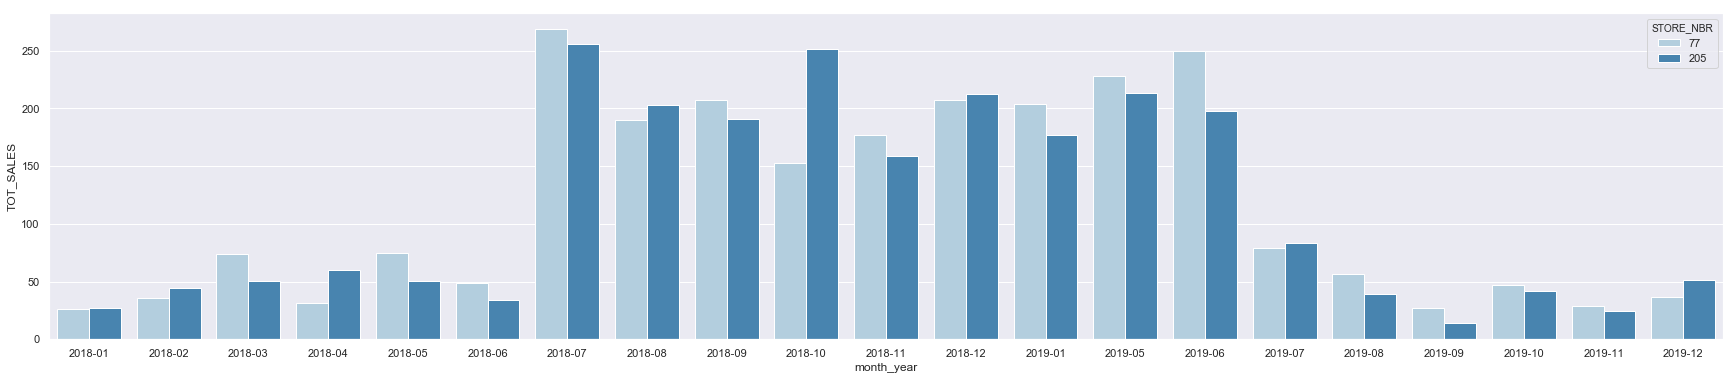

In [473]:
# plot TOT_SALES by month for each store 77
plt.figure(figsize=(30,6))
ax = sns.barplot(x = 'month_year', y='TOT_SALES', hue = 'STORE_NBR', data = df_base[df_base['STORE_NBR'].isin([77, ctrl_77])], palette = 'Blues')

# figure shows that tot sales is similar for trial and selected control store each month so selected control store is very good

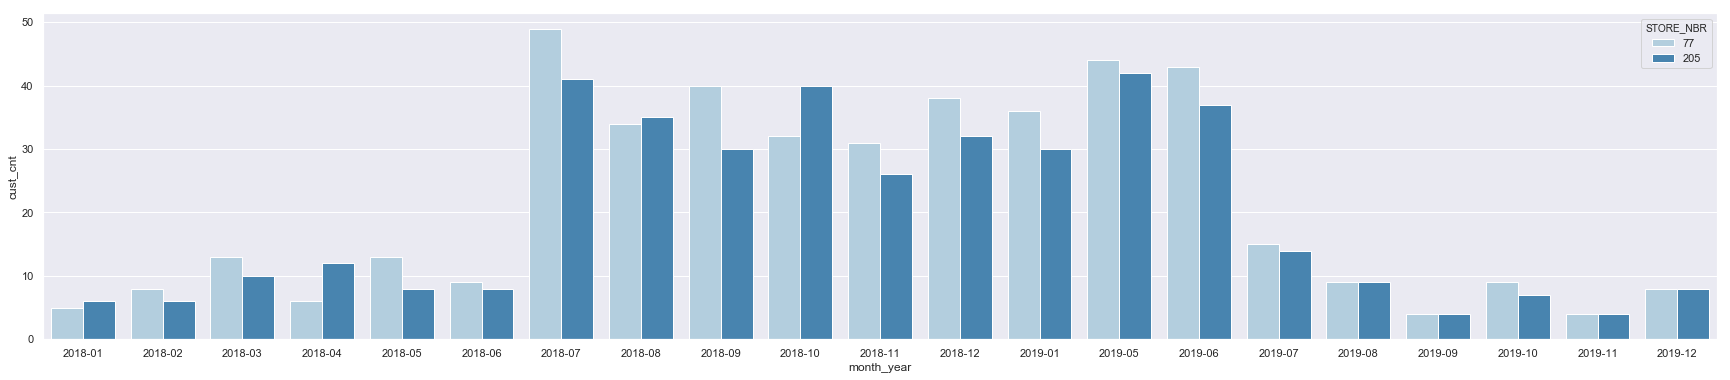

In [475]:
# plot cust_cnt by month for each store 77
plt.figure(figsize=(30,6))
ax = sns.barplot(x = 'month_year', y='cust_cnt', hue = 'STORE_NBR', data = df_base[df_base['STORE_NBR'].isin([77, ctrl_77])], palette='Blues')

# figure shows that customer count is similar for trial and selected control store month so selected control store is very good
# I can therefore assume my analysis is accurate and can be relied upon

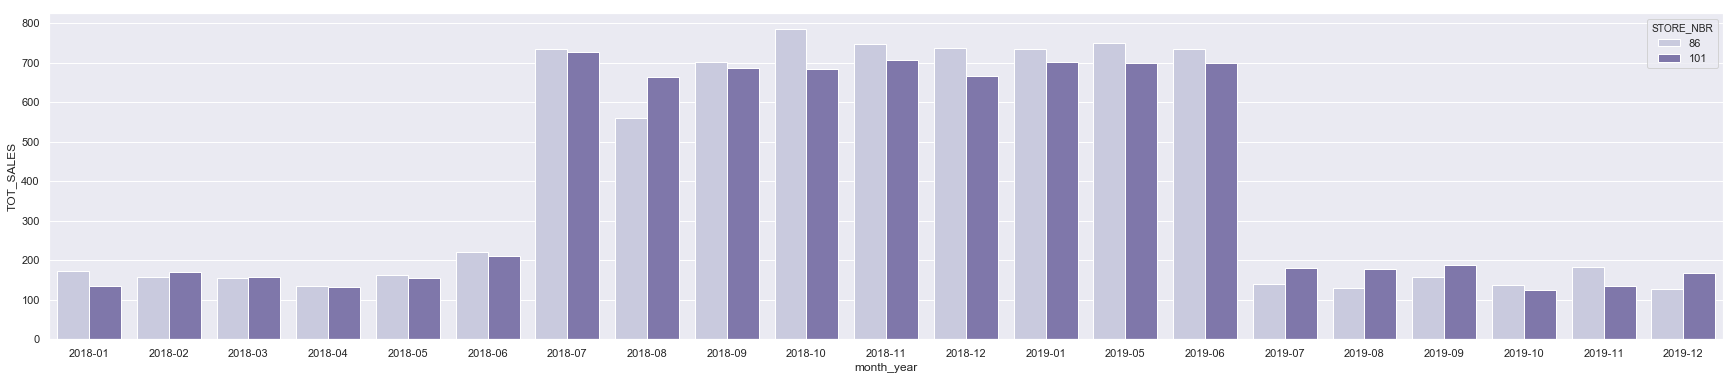

In [450]:
# plot TOT_SALES by month for each store 86
plt.figure(figsize=(30,6))
ax = sns.barplot(x = 'month_year', y='TOT_SALES', hue = 'STORE_NBR', data = df_base[df_base['STORE_NBR'].isin([86, ctrl_86])], palette = 'Purples')

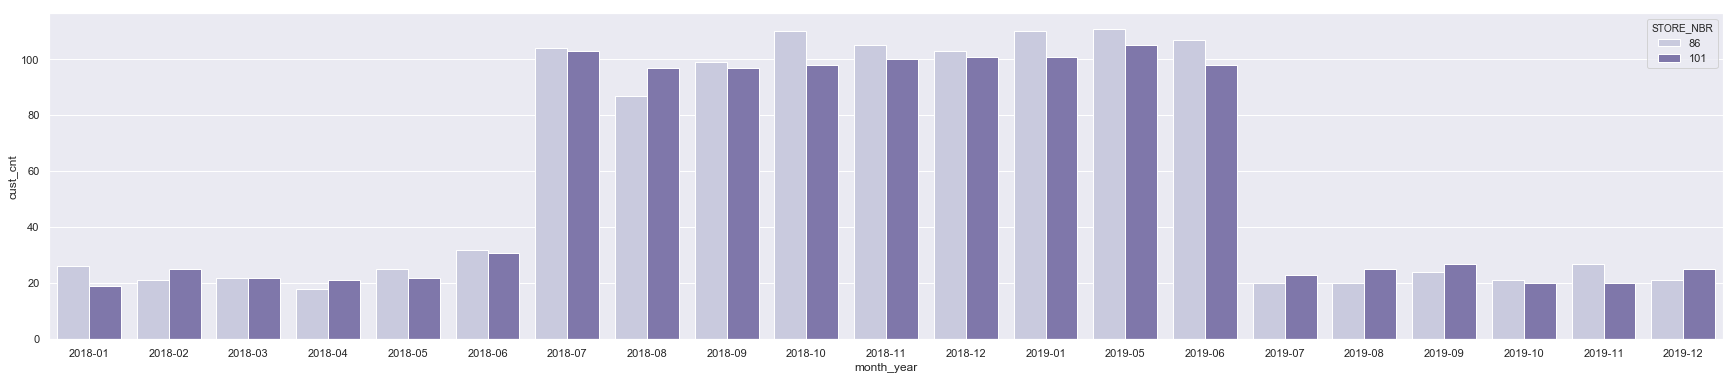

In [451]:
# plot cust_cnt by month for each store 86
plt.figure(figsize=(30,6))
ax = sns.barplot(x = 'month_year', y='cust_cnt', hue = 'STORE_NBR', data = df_base[df_base['STORE_NBR'].isin([86, ctrl_86])], palette='Purples')

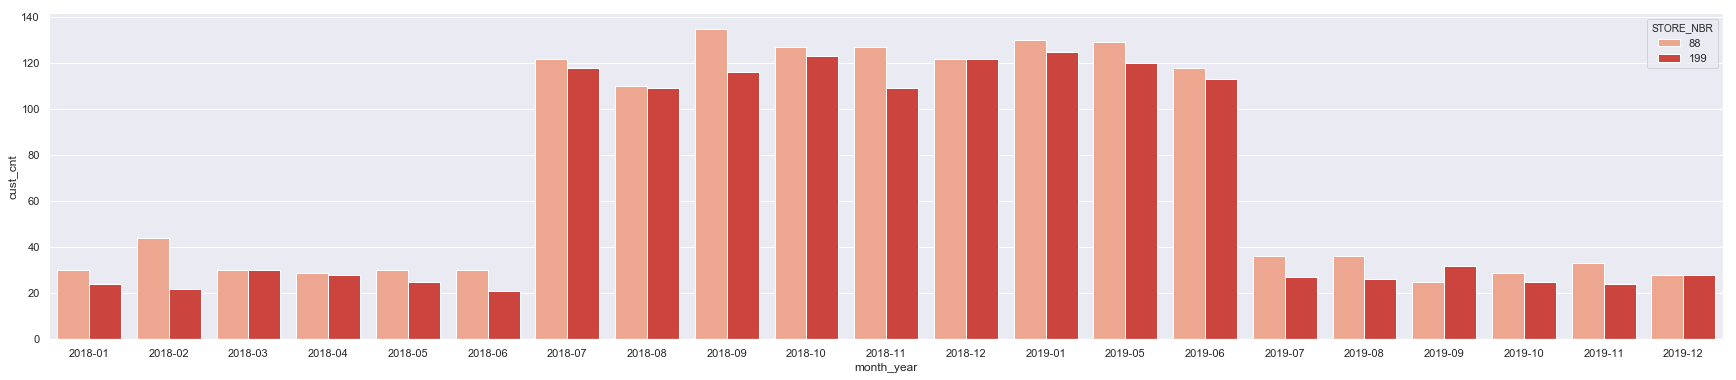

In [452]:
# plot TOT_SALES by month for each store 88
plt.figure(figsize=(30,6))
ax = sns.barplot(x = 'month_year', y='cust_cnt', hue = 'STORE_NBR', data = df_base[df_base['STORE_NBR'].isin([88, ctrl_88])], palette = 'Reds')

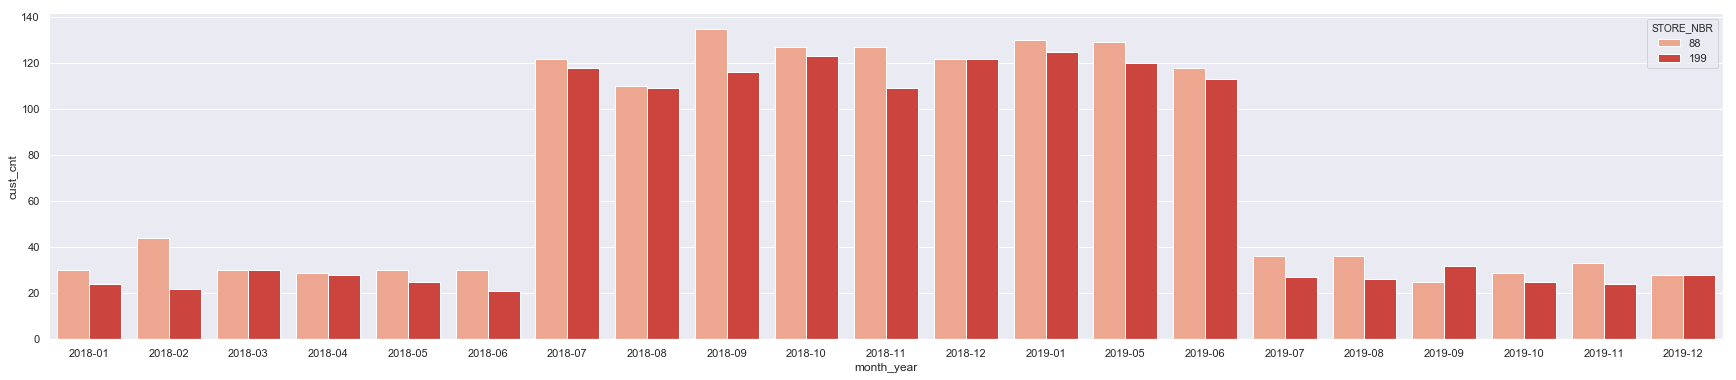

In [453]:
# plot cust_cnt by month for each store 88
plt.figure(figsize=(30,6))
ax = sns.barplot(x = 'month_year', y='cust_cnt', hue = 'STORE_NBR', data = df_base[df_base['STORE_NBR'].isin([88, ctrl_88])], palette='Reds')

In [454]:
# Part 2 of Stage 2 of Quantium VI
# create new dataframe containing original, raw data for trial stores and control stores
ct_tr = store_data_orig[store_data_orig['STORE_NBR'].isin([77,ctrl_77,86,ctrl_86, 88, ctrl_88])] 
ct_tr.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Unnamed: 12,Unnamed: 13,month_year
73365,77000,28/03/2019,77,74911,18,Cheetos Chs & Bacon Balls 190g,1,3.3,190,CHEETOS,MIDAGE SINGLES/COUPLES,Budget,-,-,2019-03
73366,77000,13/04/2019,77,74912,69,Smiths Chip Thinly S/Cream&Onion 175g,1,3.0,175,SMITHS,MIDAGE SINGLES/COUPLES,Budget,-,-,2019-04
73367,77000,26/09/2018,77,74910,36,Kettle Chilli 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget,-,-,2018-09
73368,77001,27/02/2019,77,74913,7,Smiths Crinkle Original 330g,2,11.4,330,SMITHS,YOUNG FAMILIES,Mainstream,-,-,2019-02
73369,77001,21/01/2019,77,74914,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Mainstream,-,-,2019-01


In [455]:
# add month_year to dataframe
ct_tr['month_year'] = pd.to_datetime(ct_tr['DATE']).dt.to_period('M')

C:\Users\stephen.caraher\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [456]:
# monthly overall sales revenue by store
sls_rev = ct_tr.groupby(['month_year', 'STORE_NBR'])['TOT_SALES'].sum().reset_index()
sls_rev.head()

,month_year,STORE_NBR,TOT_SALES
0,2018-01,77,25.9
1,2018-01,86,173.4
2,2018-01,88,262.4
3,2018-01,101,133.8
4,2018-01,199,222.2


In [457]:
# calc store sales and cust count for stores over full obersvation period
num_cst = ct_tr.groupby(['month_year', 'STORE_NBR'])['LYLTY_CARD_NBR'].count().reset_index()
num_cst.head(100)

,month_year,STORE_NBR,LYLTY_CARD_NBR
0,2018-01,77,5
1,2018-01,86,26
2,2018-01,88,30
3,2018-01,101,19
4,2018-01,199,24
5,2018-01,205,6
6,2018-02,77,8
7,2018-02,86,21
8,2018-02,88,44
9,2018-02,101,25


In [458]:
# join relevant dataframes together 
ct_tr_new = pd.concat([sls_rev, num_cst], axis=1)

# drop duplicate columns
ct_tr_new = ct_tr_new.loc[:,~ct_tr_new.columns.duplicated()]

# rename LYLTY_CARD_NBR to cust_cnt
ct_tr_new.rename(columns = {'LYLTY_CARD_NBR':'cust_cnt'}, inplace=True)

ct_tr_new.head()

,month_year,STORE_NBR,TOT_SALES,cust_cnt
0,2018-01,77,25.9,5
1,2018-01,86,173.4,26
2,2018-01,88,262.4,30
3,2018-01,101,133.8,19
4,2018-01,199,222.2,24


In [459]:
# select data during trial periods
# The trial period goes from the start of February 2019 to April 2019
start_date = '2019-02'
end_date = '2019-04'

tr_df = ct_tr_new[(ct_tr_new['month_year'] >= start_date) & (ct_tr_new['month_year'] <= end_date)]
tr_df.head(100)

,month_year,STORE_NBR,TOT_SALES,cust_cnt
78,2019-02,77,155.0,29
79,2019-02,86,681.2,104
80,2019-02,88,1011.8,115
81,2019-02,101,723.0,104
82,2019-02,199,942.2,107
83,2019-02,205,215.5,38
84,2019-03,77,208.6,41
85,2019-03,86,880.8,120
86,2019-03,88,1191.0,134
87,2019-03,101,565.0,82


In [460]:
# normalise tot_sales column
tr_df['TOT_SALES'] = tr_df['TOT_SALES']/tr_df['TOT_SALES'].max()

# normalise cust_cnt column
tr_df['cust_cnt'] = tr_df['cust_cnt']/tr_df['cust_cnt'].max()

C:\Users\stephen.caraher\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\stephen.caraher\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


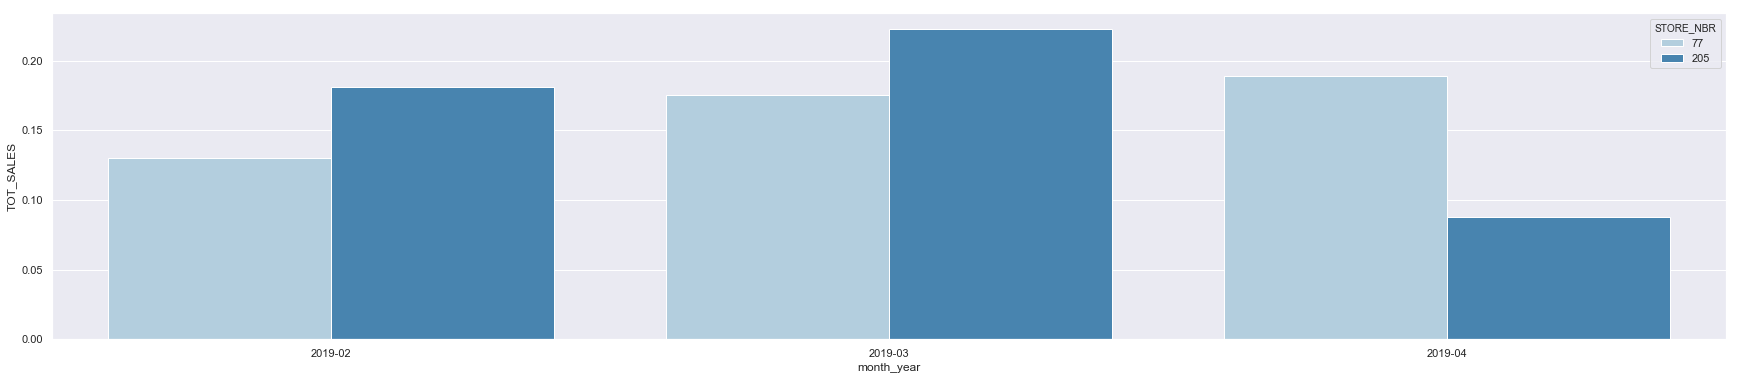

In [461]:
# plot data to visualise impact of trial 
plt.figure(figsize=(30,6))
ax = sns.barplot(x = 'month_year', y='TOT_SALES', hue = 'STORE_NBR', data = tr_df[tr_df['STORE_NBR'].isin([77, ctrl_77])], palette = 'Blues')

# fig shows higher sales in 

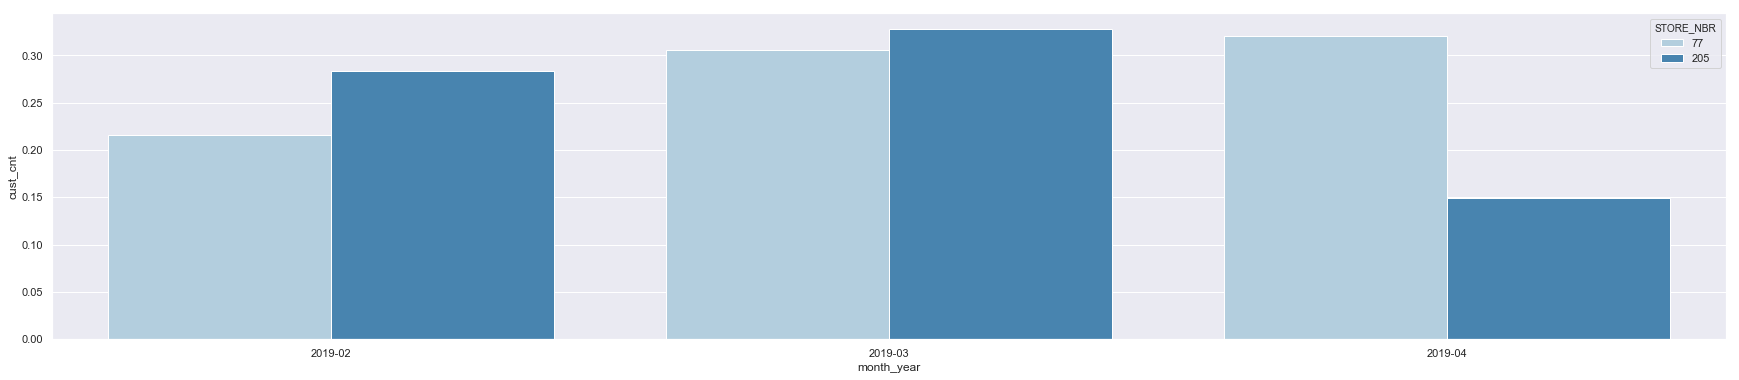

In [462]:
# plot data to visualise impact of trial 
plt.figure(figsize=(30,6))
ax = sns.barplot(x = 'month_year', y='cust_cnt', hue = 'STORE_NBR', data = tr_df[tr_df['STORE_NBR'].isin([77, ctrl_77])], palette = 'Blues')

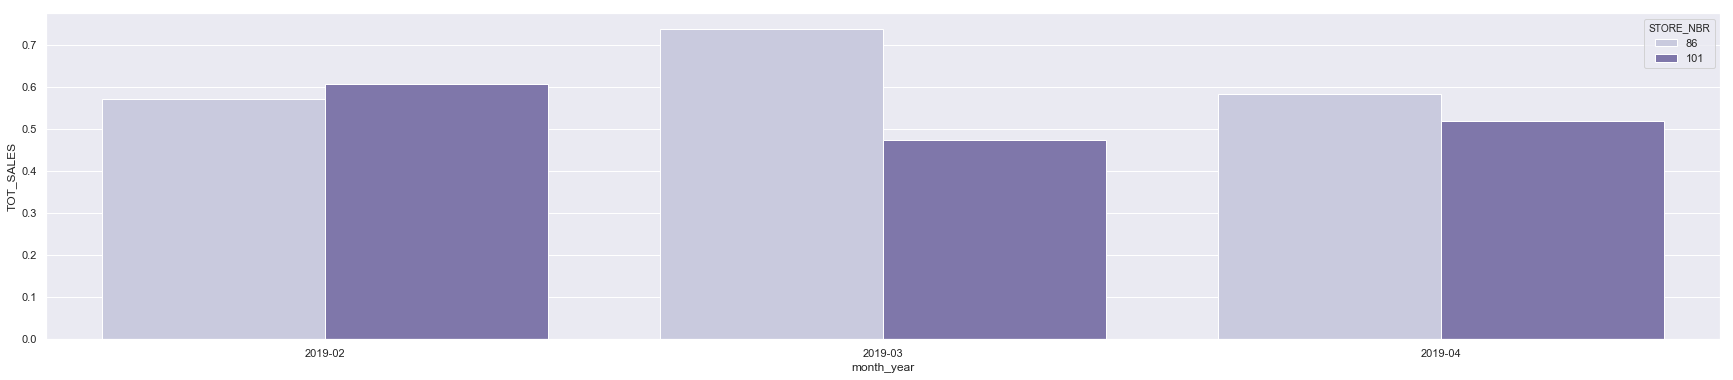

In [463]:
# plot data to visualise impact of trial 
plt.figure(figsize=(30,6))
ax = sns.barplot(x = 'month_year', y='TOT_SALES', hue = 'STORE_NBR', data = tr_df[tr_df['STORE_NBR'].isin([86, ctrl_86])], palette = 'Purples')


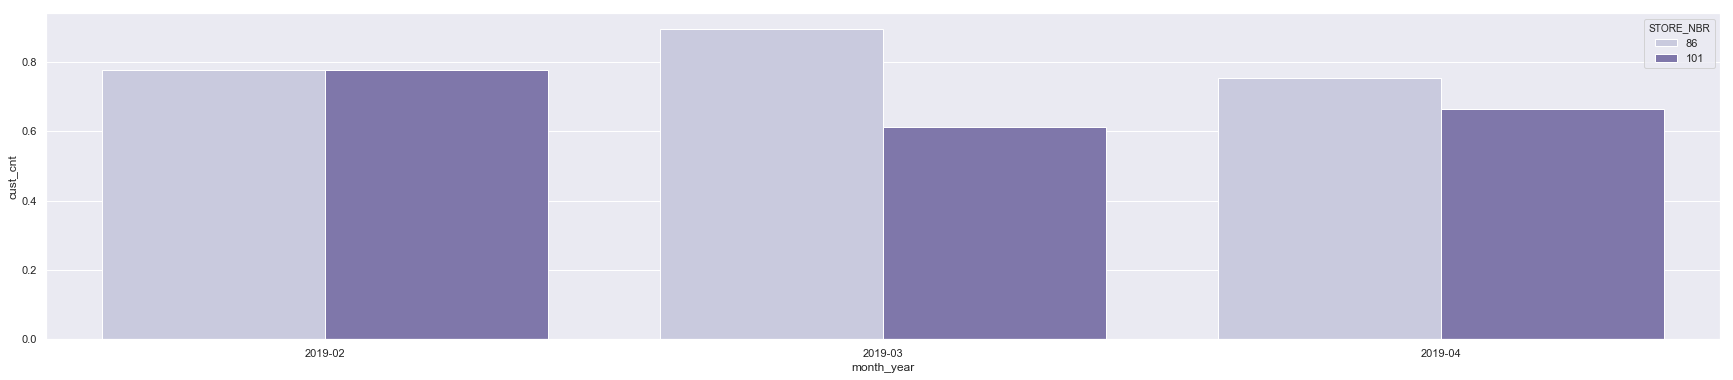

In [464]:
# plot data to visualise impact of trial 
plt.figure(figsize=(30,6))
ax = sns.barplot(x = 'month_year', y='cust_cnt', hue = 'STORE_NBR', data = tr_df[tr_df['STORE_NBR'].isin([86, ctrl_86])], palette = 'Purples')

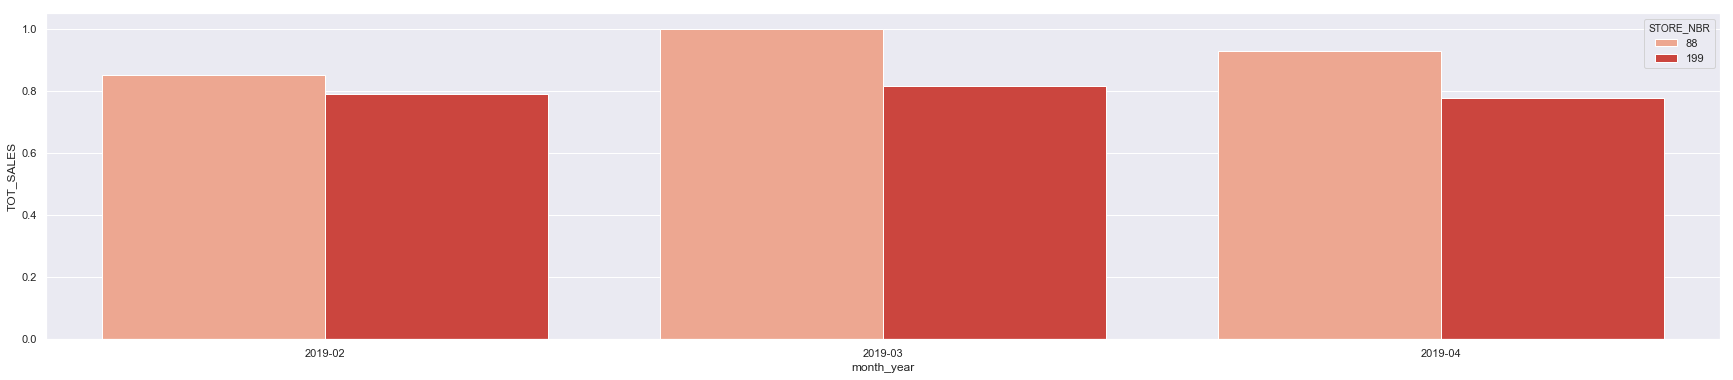

In [477]:
# plot data to visualise impact of trial 
plt.figure(figsize=(30,6))
ax = sns.barplot(x = 'month_year', y='TOT_SALES', hue = 'STORE_NBR', data = tr_df[tr_df['STORE_NBR'].isin([88, ctrl_88])], palette = 'Reds')


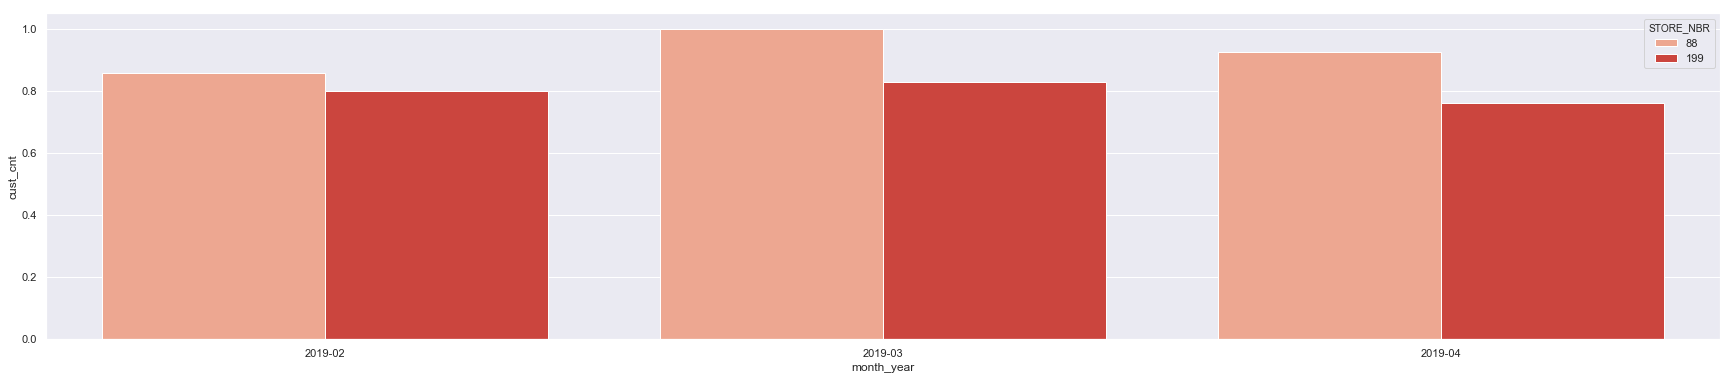

In [466]:
# plot data to visualise impact of trial 
plt.figure(figsize=(30,6))
ax = sns.barplot(x = 'month_year', y='cust_cnt', hue = 'STORE_NBR', data = tr_df[tr_df['STORE_NBR'].isin([88, ctrl_88])], palette='Reds')

In [467]:
# create dataframe for plot
tr_plot = tr_df.groupby(['STORE_NBR'])['TOT_SALES'].sum().reset_index()

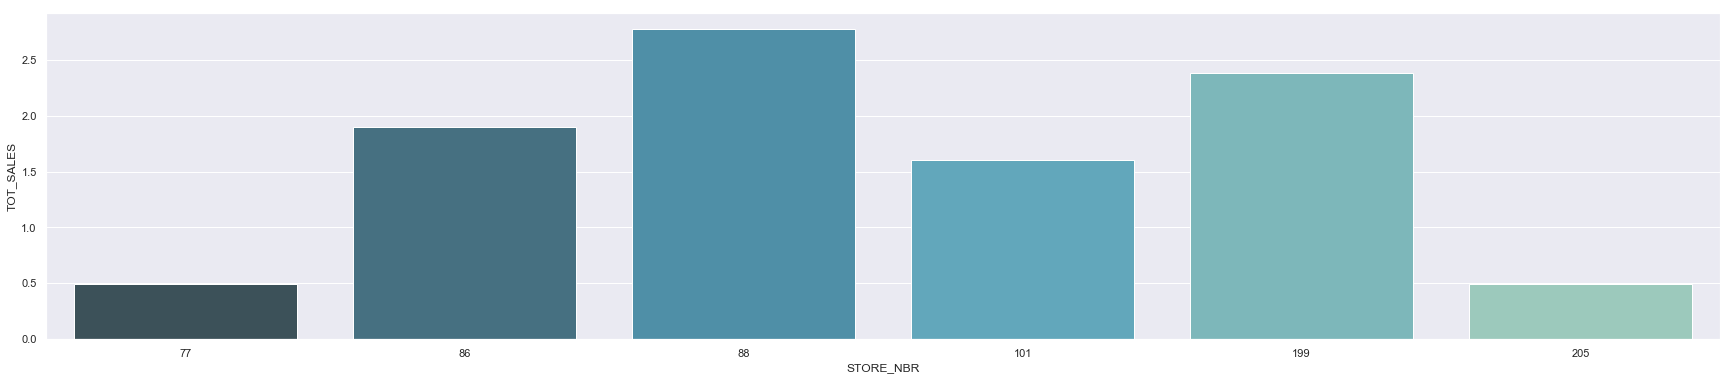

In [468]:
# plot data to visualise impact of trial 
plt.figure(figsize=(30,6))
ax = sns.barplot(x = 'STORE_NBR', y='TOT_SALES', data = tr_plot, palette="GnBu_d")

# plot suggests that trial increased tot_sales in store 88, but sales reduced in 77 and 101

In [469]:
# check against own category data
# add month_year
store_data_orig['month_year'] = pd.to_datetime(store_data_orig['DATE']).dt.to_period('M')

# sum sales
orig_sal_rev = store_data_orig.groupby(['month_year', 'STORE_NBR'])['TOT_SALES'].sum().reset_index()
orig_sal_rev.head()

,month_year,STORE_NBR,TOT_SALES
0,2018-01,1,76.0
1,2018-01,2,37.4
2,2018-01,3,180.0
3,2018-01,4,248.1
4,2018-01,5,191.0


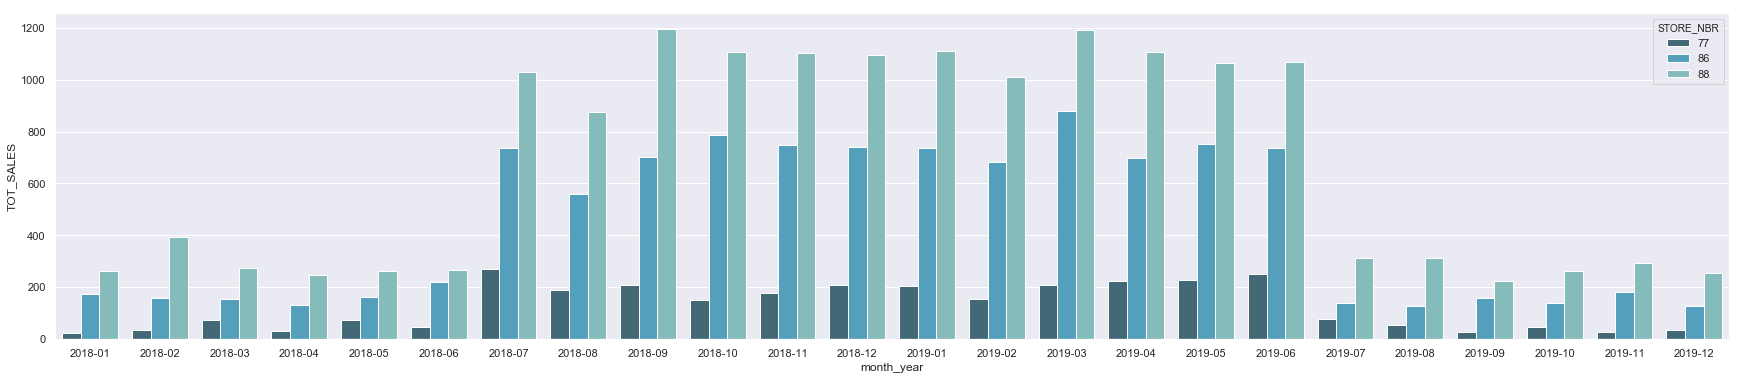

In [470]:
# plot original data over full observtion period
sns.set(style='darkgrid')
plt.figure(figsize=(30,6))

ax = sns.barplot(x = 'month_year', y='TOT_SALES', hue = 'STORE_NBR', data = orig_sal_rev[orig_sal_rev['STORE_NBR'].isin([77, 86, 88])], palette = 'GnBu_d')


In [471]:
# conclusions

# store 77
# sales are lower than control store during the trial period
# sales are higher during trial period than rest of year

# store 86
# sales are lower than control store during the trial period
# sales are higher during trial period than rest of year

# store 88
# sales are higher than control store during the trial period
# sales are higher during trial period than rest of year
